In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [3]:
import seaborn as sn
import plotly.express as px

### Upload aggregated overall suicide rates during 2010 to 2014

In [4]:
suicide_overall = pd.read_csv(r'Overall_Suicide_Aggregated/overall_2014_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_overall = suicide_overall.drop("Notes",1)
suicide_overall = suicide_overall.dropna(how = 'any')
suicide_overall['Deaths']=suicide_overall['Deaths'].astype(int)
suicide_overall['Population']=suicide_overall['Population'].astype(int)
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,54,275993,19.6,19.565714
1,"Baldwin County, AL",01003,185,955423,19.4,19.363151
2,"Barbour County, AL",01005,20,135740,14.7,14.734050
3,"Bibb County, AL",01007,17,113296,Unreliable,15.004943
4,"Blount County, AL",01009,51,288416,17.7,17.682792


### Upload aggregated firearm suicide rates during 2010 to 2014

In [5]:
suicide_firearm = pd.read_csv(r'Firearm_Suicide_Aggregated/firearm_2014_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_firearm = suicide_firearm.drop("Notes",1)
suicide_firearm = suicide_firearm.dropna(how = 'any')
suicide_firearm['Deaths']=suicide_firearm['Deaths'].astype(int)
suicide_firearm['Population']=suicide_firearm['Population'].astype(int)
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,41,275993,14.9,14.855449
1,"Baldwin County, AL",01003,124,955423,13.0,12.978545
2,"Barbour County, AL",01005,12,135740,Unreliable,8.840430
3,"Bibb County, AL",01007,14,113296,Unreliable,12.357012
4,"Blount County, AL",01009,34,288416,11.8,11.788528


### Upload aggregated non-firearm suicide rates during 2010 to 2014

In [6]:
suicide_nonfirearm = pd.read_csv(r'Nonfirearm_Suicide_Aggregated/nonfirearm_2014_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_nonfirearm = suicide_nonfirearm.drop("Notes",1)
suicide_nonfirearm = suicide_nonfirearm.dropna(how = 'any')
suicide_nonfirearm['Deaths']=suicide_nonfirearm['Deaths'].astype(int)
suicide_nonfirearm['Population']=suicide_nonfirearm['Population'].astype(int)
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,13,275993,Unreliable,4.710264
1,"Baldwin County, AL",01003,61,955423,6.4,6.384607
2,"Blount County, AL",01009,17,288416,Unreliable,5.894264
3,"Calhoun County, AL",01015,26,586317,4.4,4.434461
4,"Cherokee County, AL",01019,13,130307,Unreliable,9.976440


In [7]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2311
1,firearm,1915
2,nonfirearm,1364


### make up the missing non-firearm death records as many as possible

In [8]:
FS = suicide_firearm[['County Code', 'Deaths']]
FS = FS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_FS'})
NFS = suicide_nonfirearm[['County Code', 'Deaths']]
NFS = NFS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_NFS'})
suicide = suicide_overall[['County', 'County Code', 'Deaths', 'Population']]
suicide = suicide.rename(columns = {'County Code': 'fips'})

In [9]:
FS.head()

,fips,Deaths_FS
0,01001,41
1,01003,124
2,01005,12
3,01007,14
4,01009,34


In [10]:
NFS.head()

,fips,Deaths_NFS
0,01001,13
1,01003,61
2,01009,17
3,01015,26
4,01019,13


In [11]:
suicide.head()

,County,fips,Deaths,Population
0,"Autauga County, AL",01001,54,275993
1,"Baldwin County, AL",01003,185,955423
2,"Barbour County, AL",01005,20,135740
3,"Bibb County, AL",01007,17,113296
4,"Blount County, AL",01009,51,288416


In [12]:
suicide = suicide.merge(FS, on = 'fips', how = 'left')
suicide = suicide.merge(NFS, on = 'fips', how = 'left')
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,54,275993,41.0,13.0
1,"Baldwin County, AL",01003,185,955423,124.0,61.0
2,"Barbour County, AL",01005,20,135740,12.0,NaN
3,"Bibb County, AL",01007,17,113296,14.0,NaN
4,"Blount County, AL",01009,51,288416,34.0,17.0


In [13]:
suicide['Deaths_NFS'] = suicide['Deaths'] - suicide['Deaths_FS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,54,275993,41.0,13.0
1,"Baldwin County, AL",01003,185,955423,124.0,61.0
2,"Barbour County, AL",01005,20,135740,12.0,8.0
3,"Bibb County, AL",01007,17,113296,14.0,3.0
4,"Blount County, AL",01009,51,288416,34.0,17.0


In [14]:
suicide['Deaths_FS'] = suicide['Deaths'] - suicide['Deaths_NFS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,54,275993,41.0,13.0
1,"Baldwin County, AL",01003,185,955423,124.0,61.0
2,"Barbour County, AL",01005,20,135740,12.0,8.0
3,"Bibb County, AL",01007,17,113296,14.0,3.0
4,"Blount County, AL",01009,51,288416,34.0,17.0


In [15]:
suicide_overall = suicide[['County', 'fips', 'Deaths', 'Population']]
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,54,275993,19.565714
1,"Baldwin County, AL",01003,185,955423,19.363151
2,"Barbour County, AL",01005,20,135740,14.734050
3,"Bibb County, AL",01007,17,113296,15.004943
4,"Blount County, AL",01009,51,288416,17.682792


In [16]:
suicide_firearm = suicide[['County', 'fips', 'Deaths_FS', 'Population']]
suicide_firearm = suicide_firearm.rename(columns = {'Deaths_FS': 'Deaths'})
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,41.0,275993,14.855449
1,"Baldwin County, AL",01003,124.0,955423,12.978545
2,"Barbour County, AL",01005,12.0,135740,8.840430
3,"Bibb County, AL",01007,14.0,113296,12.357012
4,"Blount County, AL",01009,34.0,288416,11.788528


In [17]:
suicide_nonfirearm = suicide[['County', 'fips', 'Deaths_NFS', 'Population']]
suicide_nonfirearm = suicide_nonfirearm.rename(columns = {'Deaths_NFS': 'Deaths'})
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,13.0,275993,4.710264
1,"Baldwin County, AL",01003,61.0,955423,6.384607
2,"Barbour County, AL",01005,8.0,135740,5.893620
3,"Bibb County, AL",01007,3.0,113296,2.647931
4,"Blount County, AL",01009,17.0,288416,5.894264


In [18]:
suicide_overall = suicide_overall.dropna()
suicide_firearm = suicide_firearm.dropna()
suicide_nonfirearm = suicide_nonfirearm.dropna()

In [19]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2311
1,firearm,1915
2,nonfirearm,1915


In [20]:
suicide_overall['Suicide Type'] = 'Overall'
suicide_firearm['Suicide Type'] = 'Firearm'
suicide_nonfirearm['Suicide Type'] = 'Nonfirearm'

In [21]:
frames = [suicide_overall, suicide_firearm, suicide_nonfirearm]
suicide = pd.concat(frames)
suicide['year'] = '2014'
suicide.head()

,County,fips,Deaths,Population,SuicideDeathRate,Suicide Type,year
0,"Autauga County, AL",01001,54.0,275993,19.565714,Overall,2014
1,"Baldwin County, AL",01003,185.0,955423,19.363151,Overall,2014
2,"Barbour County, AL",01005,20.0,135740,14.734050,Overall,2014
3,"Bibb County, AL",01007,17.0,113296,15.004943,Overall,2014
4,"Blount County, AL",01009,51.0,288416,17.682792,Overall,2014


In [22]:
suicide.shape

(6141, 7)

In [23]:
suicide.to_csv('suicide_all_types_2014.csv')

## uploading environmental data

In [19]:
ur_files = ddf.read_csv('Climate_Factors/climate_factors_aggregated_2014.csv', dtype = {'fips': str})
climate = ur_files.compute()
climate = climate.loc[:, ~climate.columns.str.contains('^Unnamed')]
climate = climate.drop(['county'], axis = 1)
climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone
0,01001,65.478995,54.924031,9.435179,4.240115,0.147685,0.135206,0.489257,0.007146,0.0,0.160033,68.744272,64.957875,11.04,0.6
1,01003,68.323744,NaN,NaN,5.813857,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.34,3.8
2,01005,65.968010,54.847483,9.158586,2.996173,0.096543,0.112594,0.543560,0.032925,0.0,0.205950,67.474286,65.436102,10.76,0.2
3,01007,63.460371,52.942003,8.922660,3.231757,0.163259,0.089261,0.348851,0.011507,0.0,0.136361,68.609052,62.731034,10.82,2.0
4,01009,59.924061,NaN,NaN,3.986872,0.160897,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.50,4.4


## uploading social economic data

In [20]:
ur_files = ddf.read_csv('Social_Economic_Factors/Social_Economic_2014.csv', dtype = {'fips': str, 'per_capita_income': float})
social = ur_files.compute()
social = social.loc[:, ~social.columns.str.contains('^Unnamed')]
social = social.drop(['year'], axis = 1)
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality
0,01001,24644.0,12.805235,14.776585,18.839361,5.324074,19.564231,2.610323,3.753734,13.278076,2.600491,23.764872,29.967308,0.801654,25.176007,20.648941,14.301001,14.999275,10.992818,3.0
1,01003,26851.0,13.776798,11.269857,13.924091,3.068795,23.230896,1.366038,17.987363,17.667948,5.608360,16.818598,24.800071,1.365550,22.370560,19.142805,12.717241,14.140844,13.744933,4.0
2,01005,17350.0,24.084245,26.598004,25.439175,8.769820,33.635885,1.946419,1.090172,15.413548,4.602969,53.888418,36.558944,10.579299,47.117025,23.124009,12.592647,14.333124,12.920830,6.0
3,01007,18110.0,17.042654,23.018555,30.668501,4.224357,33.282884,0.240181,1.814135,14.165894,2.377518,25.237275,29.863265,6.957136,26.557040,22.835827,13.464000,16.019953,11.870392,2.0
4,01009,20501.0,17.283605,22.769640,23.794088,3.931403,26.092869,1.643260,0.900788,15.911181,6.671600,11.839709,30.964474,0.992280,22.392151,19.866424,13.109550,14.249284,12.790355,2.0


## uploading altitude data

In [21]:
ur_files = ddf.read_csv('county_altitude.csv', dtype = {'FIPSCODE': str})
altitude = ur_files.compute()
altitude = altitude.rename(columns = {'FIPSCODE': 'fips', 'elevation': 'altitude'})
altitude = altitude[['fips', 'altitude']]
altitude.head()

,fips,altitude
0,19107,207.03
1,19189,390.25
2,19029,385.95
3,19015,268.98
4,19059,425.89


In [22]:
social = social.merge(altitude, on = 'fips', how = 'left')
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude
0,01001,24644.0,12.805235,14.776585,18.839361,5.324074,19.564231,2.610323,3.753734,13.278076,...,23.764872,29.967308,0.801654,25.176007,20.648941,14.301001,14.999275,10.992818,3.0,128.66
1,01003,26851.0,13.776798,11.269857,13.924091,3.068795,23.230896,1.366038,17.987363,17.667948,...,16.818598,24.800071,1.365550,22.370560,19.142805,12.717241,14.140844,13.744933,4.0,30.30
2,01005,17350.0,24.084245,26.598004,25.439175,8.769820,33.635885,1.946419,1.090172,15.413548,...,53.888418,36.558944,10.579299,47.117025,23.124009,12.592647,14.333124,12.920830,6.0,122.81
3,01007,18110.0,17.042654,23.018555,30.668501,4.224357,33.282884,0.240181,1.814135,14.165894,...,25.237275,29.863265,6.957136,26.557040,22.835827,13.464000,16.019953,11.870392,2.0,74.90
4,01009,20501.0,17.283605,22.769640,23.794088,3.931403,26.092869,1.643260,0.900788,15.911181,...,11.839709,30.964474,0.992280,22.392151,19.866424,13.109550,14.249284,12.790355,2.0,184.46


In [23]:
climate.shape[0]

3142

In [24]:
social.shape[0]

3220

# Check SHAP value with overall suicide rates in 2292 counties

In [27]:
suicide_social = social.merge(suicide_overall[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24644.0,12.805235,14.776585,18.839361,5.324074,19.564231,2.610323,3.753734,13.278076,...,29.967308,0.801654,25.176007,20.648941,14.301001,14.999275,10.992818,3.0,128.66,19.565714
1,01003,26851.0,13.776798,11.269857,13.924091,3.068795,23.230896,1.366038,17.987363,17.667948,...,24.800071,1.365550,22.370560,19.142805,12.717241,14.140844,13.744933,4.0,30.30,19.363151
2,01005,17350.0,24.084245,26.598004,25.439175,8.769820,33.635885,1.946419,1.090172,15.413548,...,36.558944,10.579299,47.117025,23.124009,12.592647,14.333124,12.920830,6.0,122.81,14.734050
3,01007,18110.0,17.042654,23.018555,30.668501,4.224357,33.282884,0.240181,1.814135,14.165894,...,29.863265,6.957136,26.557040,22.835827,13.464000,16.019953,11.870392,2.0,74.90,15.004943
4,01009,20501.0,17.283605,22.769640,23.794088,3.931403,26.092869,1.643260,0.900788,15.911181,...,30.964474,0.992280,22.392151,19.866424,13.109550,14.249284,12.790355,2.0,184.46,17.682792


## SHAP

In [28]:
import xgboost
import shap

In [29]:
suicide_social = suicide_social.dropna()
suicide_social.shape[0]

2292

In [30]:
X = suicide_social.iloc[:, 1:-1]
y = suicide_social.iloc[:, -1].array

In [31]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


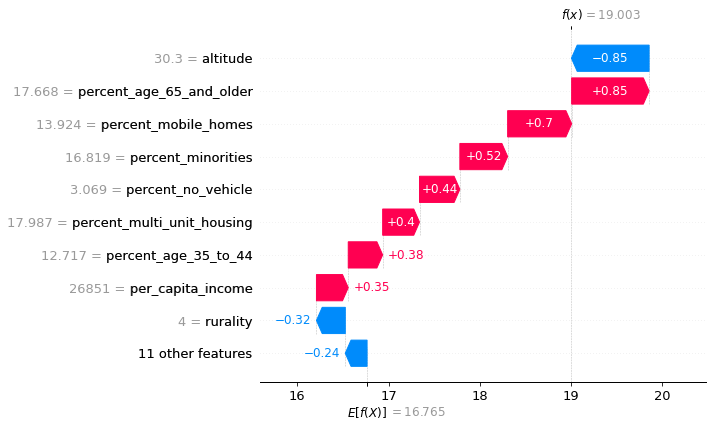

In [32]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

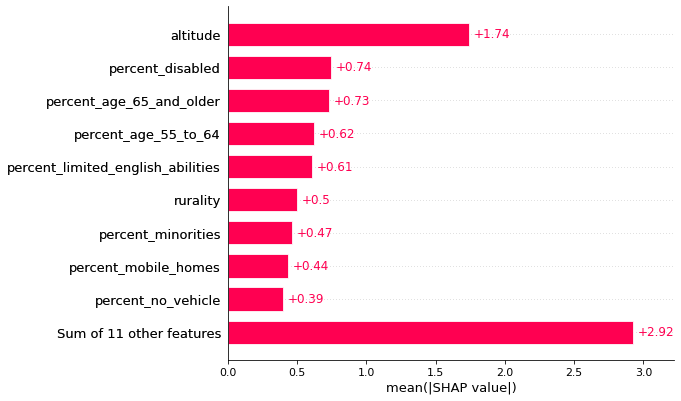

In [33]:
shap.plots.bar(shap_values)

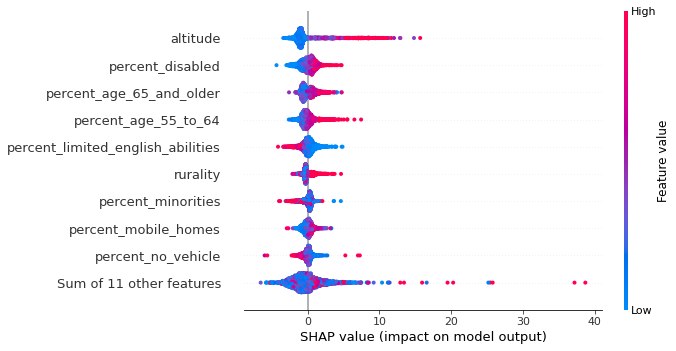

In [34]:
shap.plots.beeswarm(shap_values)

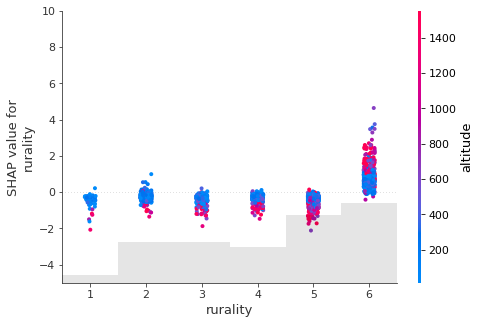

In [35]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 10)

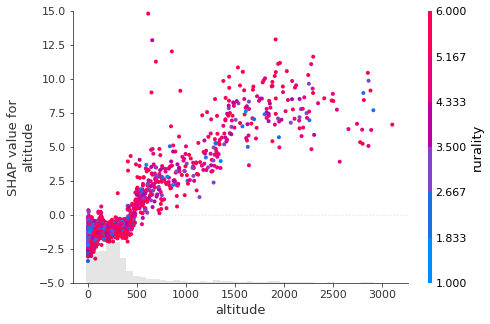

In [36]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

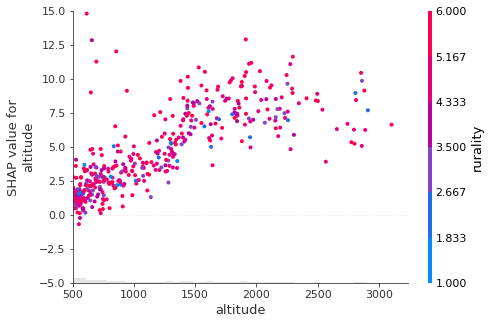

In [37]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

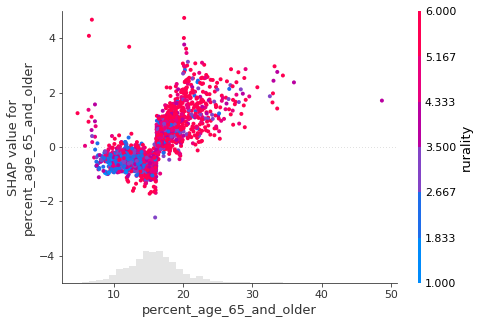

In [38]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

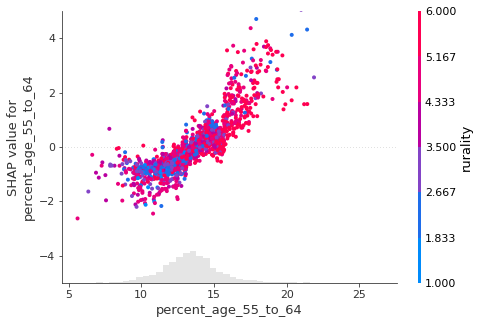

In [39]:
shap.plots.scatter(shap_values[:,"percent_age_55_to_64"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

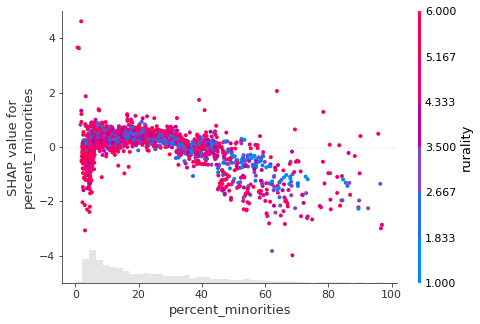

In [40]:
shap.plots.scatter(shap_values[:,"percent_minorities"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

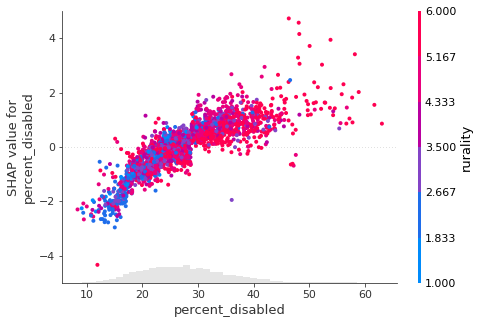

In [41]:
shap.plots.scatter(shap_values[:,"percent_disabled"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP value with firearm suicide rates in 1897 counties

In [42]:
firearm_social = social.merge(suicide_firearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24644.0,12.805235,14.776585,18.839361,5.324074,19.564231,2.610323,3.753734,13.278076,...,29.967308,0.801654,25.176007,20.648941,14.301001,14.999275,10.992818,3.0,128.66,14.855449
1,01003,26851.0,13.776798,11.269857,13.924091,3.068795,23.230896,1.366038,17.987363,17.667948,...,24.800071,1.365550,22.370560,19.142805,12.717241,14.140844,13.744933,4.0,30.30,12.978545
2,01005,17350.0,24.084245,26.598004,25.439175,8.769820,33.635885,1.946419,1.090172,15.413548,...,36.558944,10.579299,47.117025,23.124009,12.592647,14.333124,12.920830,6.0,122.81,8.840430
3,01007,18110.0,17.042654,23.018555,30.668501,4.224357,33.282884,0.240181,1.814135,14.165894,...,29.863265,6.957136,26.557040,22.835827,13.464000,16.019953,11.870392,2.0,74.90,12.357012
4,01009,20501.0,17.283605,22.769640,23.794088,3.931403,26.092869,1.643260,0.900788,15.911181,...,30.964474,0.992280,22.392151,19.866424,13.109550,14.249284,12.790355,2.0,184.46,11.788528


In [43]:
firearm_social = firearm_social.dropna()
firearm_social.shape[0]

1897

In [44]:
X = firearm_social.iloc[:, 1:-1]
y = firearm_social.iloc[:, -1].array

In [45]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


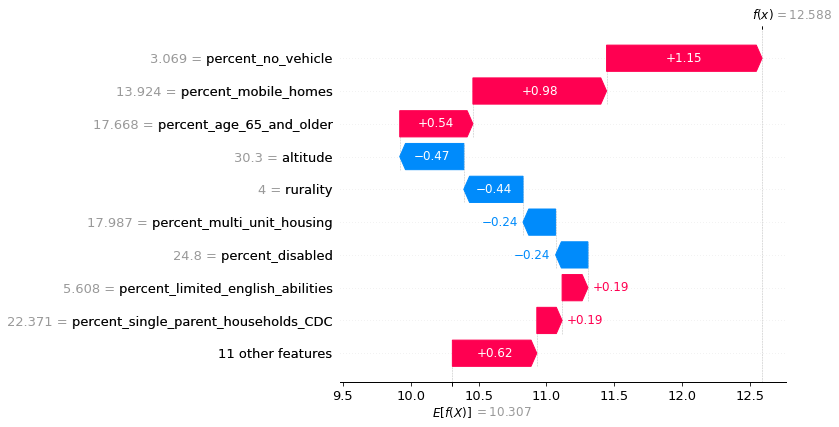

In [46]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

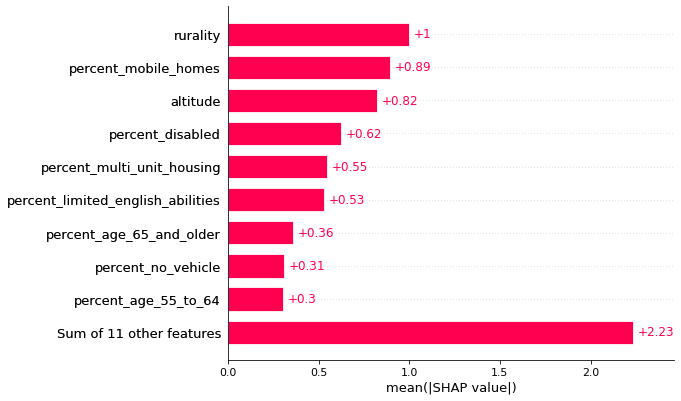

In [47]:
shap.plots.bar(shap_values)

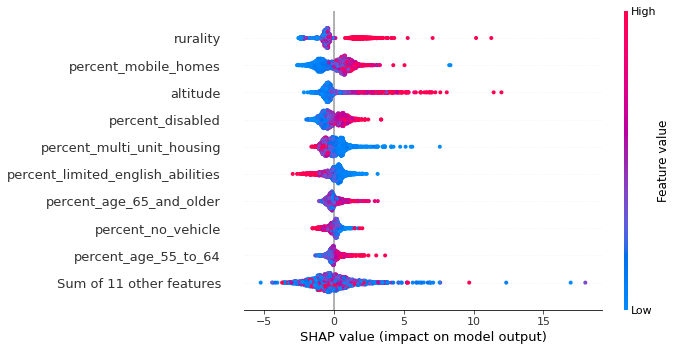

In [48]:
shap.plots.beeswarm(shap_values)

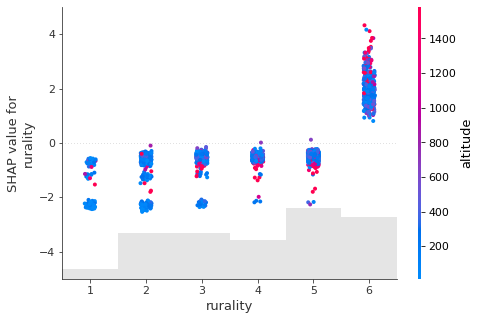

In [49]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

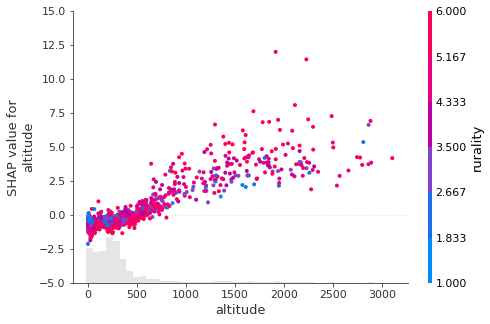

In [50]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

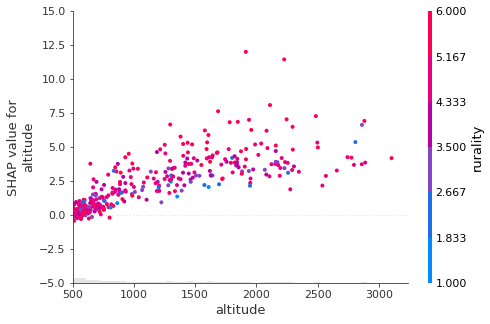

In [51]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

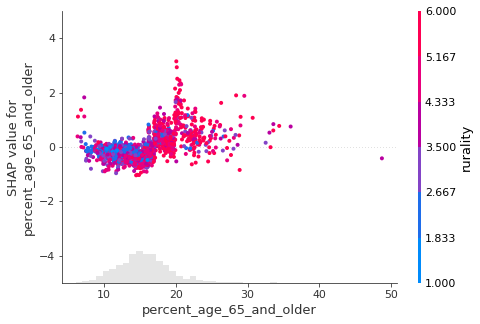

In [52]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

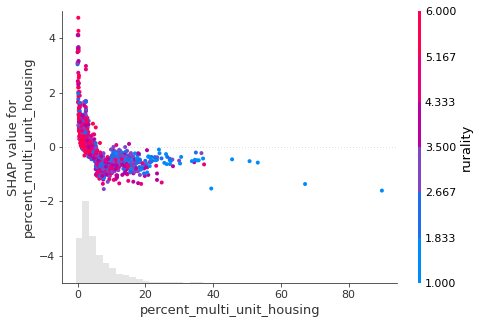

In [53]:
shap.plots.scatter(shap_values[:,"percent_multi_unit_housing"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP values with nonfirearm suicide rates in 1897 counties

In [54]:
nonfirearm_social = social.merge(suicide_nonfirearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24644.0,12.805235,14.776585,18.839361,5.324074,19.564231,2.610323,3.753734,13.278076,...,29.967308,0.801654,25.176007,20.648941,14.301001,14.999275,10.992818,3.0,128.66,4.710264
1,01003,26851.0,13.776798,11.269857,13.924091,3.068795,23.230896,1.366038,17.987363,17.667948,...,24.800071,1.365550,22.370560,19.142805,12.717241,14.140844,13.744933,4.0,30.30,6.384607
2,01005,17350.0,24.084245,26.598004,25.439175,8.769820,33.635885,1.946419,1.090172,15.413548,...,36.558944,10.579299,47.117025,23.124009,12.592647,14.333124,12.920830,6.0,122.81,5.893620
3,01007,18110.0,17.042654,23.018555,30.668501,4.224357,33.282884,0.240181,1.814135,14.165894,...,29.863265,6.957136,26.557040,22.835827,13.464000,16.019953,11.870392,2.0,74.90,2.647931
4,01009,20501.0,17.283605,22.769640,23.794088,3.931403,26.092869,1.643260,0.900788,15.911181,...,30.964474,0.992280,22.392151,19.866424,13.109550,14.249284,12.790355,2.0,184.46,5.894264


In [55]:
nonfirearm_social = nonfirearm_social.dropna()
nonfirearm_social.shape[0]

1897

In [56]:
X = nonfirearm_social.iloc[:, 1:-1]
y = nonfirearm_social.iloc[:, -1].array

In [57]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


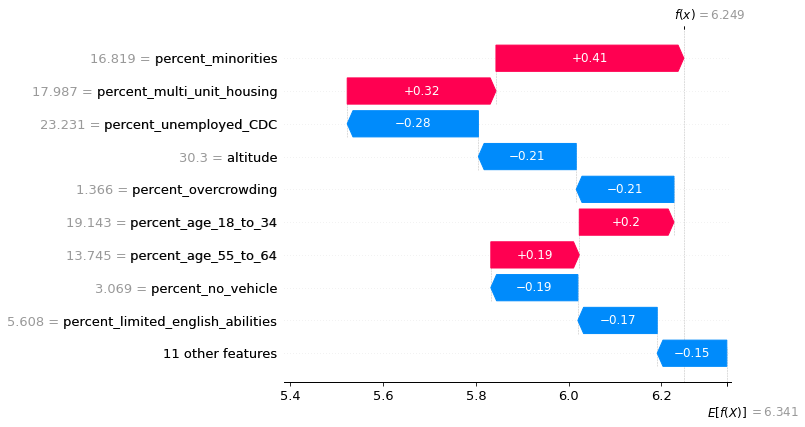

In [58]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

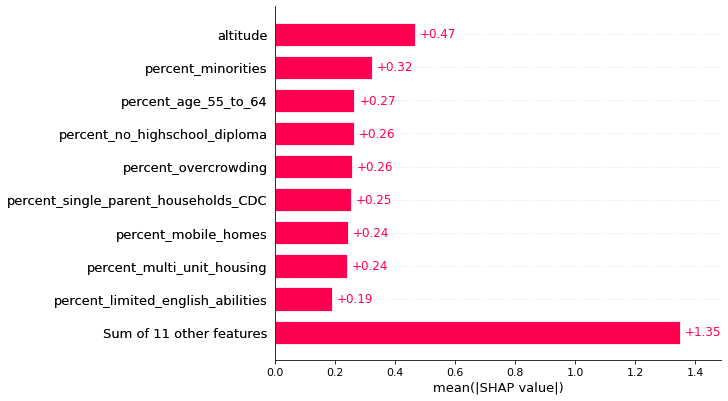

In [59]:
shap.plots.bar(shap_values)

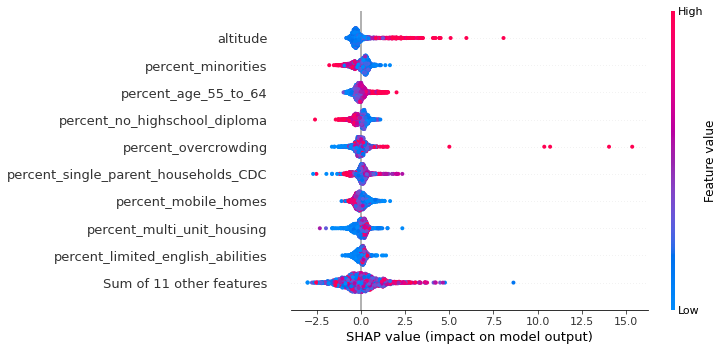

In [60]:
shap.plots.beeswarm(shap_values)

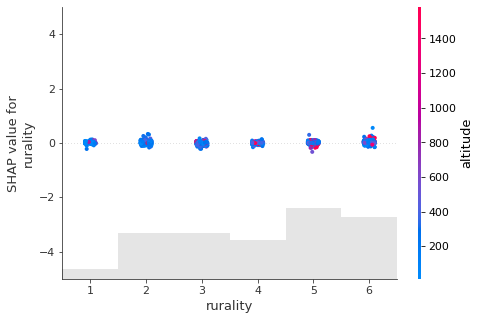

In [61]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

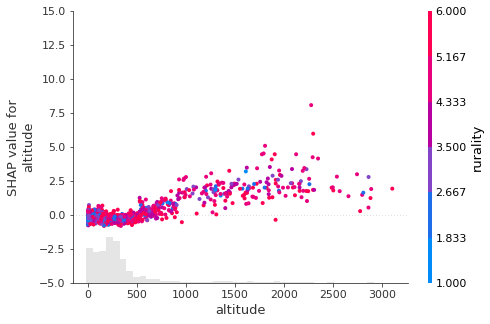

In [62]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

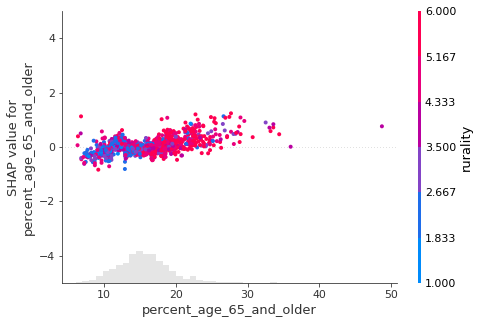

In [63]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

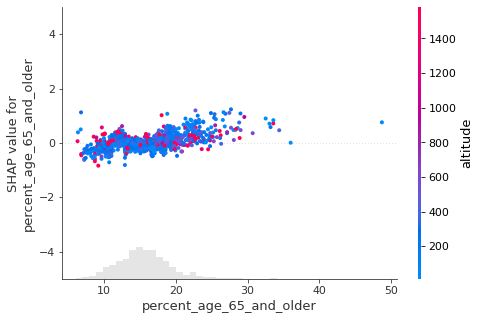

In [64]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)